In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import pandas.util.testing as tm

/Users/lalitmehendiratta/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# importing the dataset

In [2]:
TC = pd.read_csv('/Users/lalitmehendiratta/Downloads/Data Science/Assignments/Multiple Linear Regression/ToyotaCorolla.csv',encoding= 'unicode_escape')

In [3]:
TC.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
#Reqd columns: Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")

# Dropping the unnecessary columns

In [5]:
tc = TC.drop(['Id','Model','Mfg_Month', 'Mfg_Year','Fuel_Type','Met_Color', 'Color', 'Automatic','Cylinders',
             'Mfr_Guarantee','BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 
              'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 
              'Power_Steering', 'Radio','Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
              'Radio_cassette', 'Tow_Bar'], axis=1)

In [6]:
tc.head(3)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165


In [7]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
#Checking for na values
tc.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [9]:
tc.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [10]:
tc.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


# Checking duplicates

In [11]:
tc[tc.duplicated()].shape

(1, 9)

In [12]:
tc[tc.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [13]:
#Dropping the duplicated value
tc1a = tc.drop([113],axis=0)

In [14]:
#Resetting the index
tc1b= tc1a.reset_index()

In [15]:
#Dropping index column
tc1= tc1b.drop(['index'],axis=1)

In [16]:
tc1.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

<AxesSubplot:xlabel='Age_08_04'>

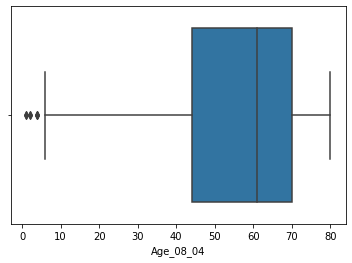

In [17]:
sns.boxplot(x='Age_08_04',data=tc1)

In [18]:
tc1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


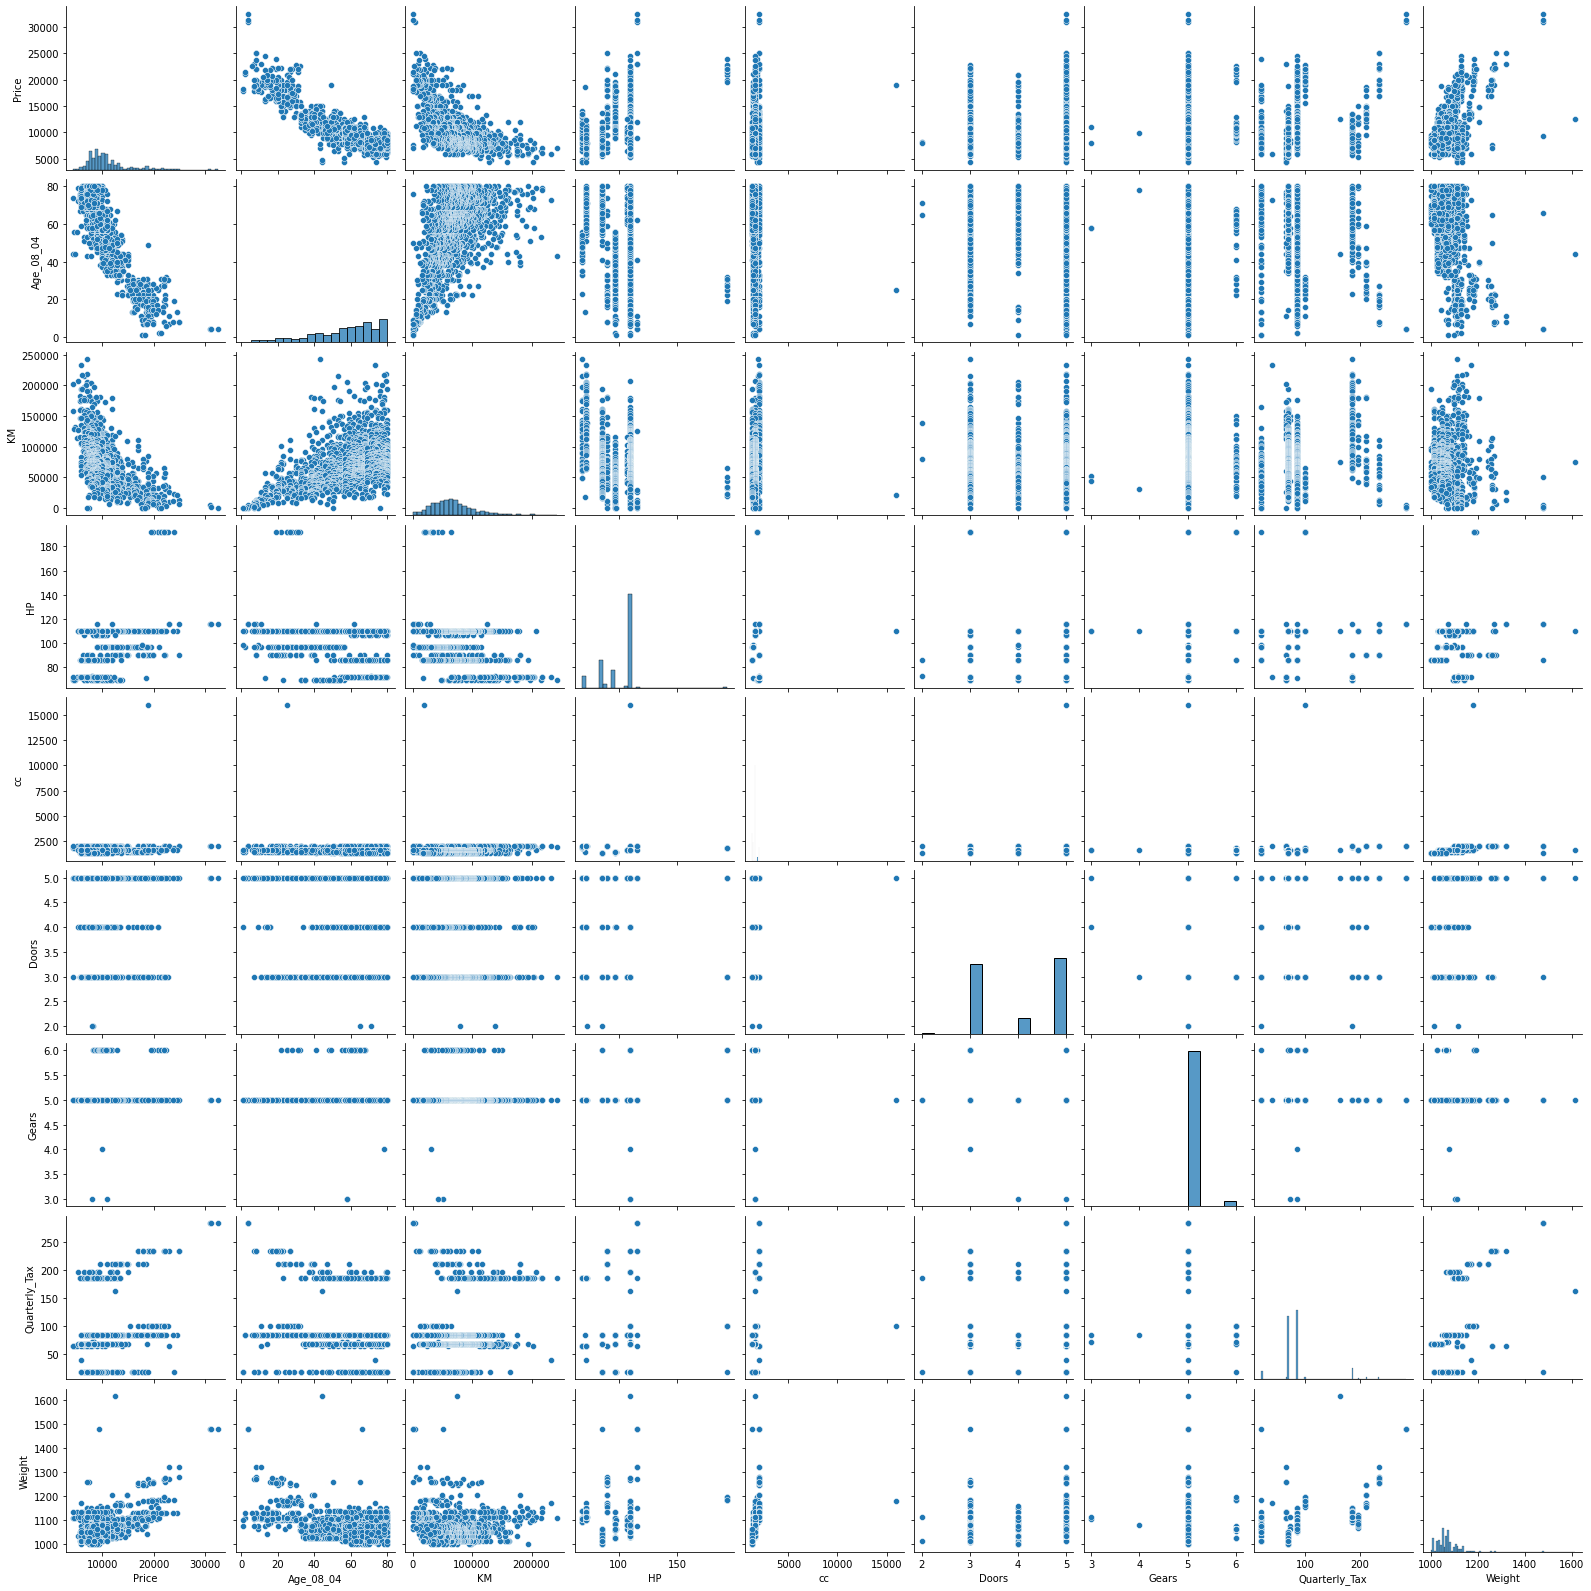

In [19]:
sns.pairplot(data=tc1)

# Building model

In [20]:
model_1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=tc1).fit()

In [21]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:12:01   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# The P value of Doors and cc is high

In [22]:
model_1a = smf.ols('Price~Doors', data= tc1).fit()

In [23]:
model_1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           2.40e-12
Time:                        16:12:01   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As per this p value, the variable Doors is significant

In [24]:
model_1b = smf.ols('Price~cc',data=tc1).fit()

In [25]:
model_1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           2.29e-06
Time:                        16:12:01   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# As per this p value, the variable cc is significant

In [26]:
rsq_1 = smf.ols('cc~KM+HP+Age_08_04+Doors+Gears+Quarterly_Tax+Weight',data=tc1).fit().rsquared  
vif_1 = 1/(1-rsq_1) 

rsq_2 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tc1).fit().rsquared  
vif_2 = 1/(1-rsq_2) 

rsq_3 = smf.ols('KM~Age_08_04+HP+cc+Doors+Quarterly_Tax+Gears+Weight',data=tc1).fit().rsquared  
vif_3 = 1/(1-rsq_3) 

rsq_4 = smf.ols('HP~Age_08_04+KM+cc+Doors+Quarterly_Tax+Gears+Weight',data=tc1).fit().rsquared  
vif_4 = 1/(1-rsq_4) 

rsq_5 = smf.ols('Doors~Age_08_04+KM+cc+HP+Quarterly_Tax+Gears+Weight',data=tc1).fit().rsquared  
vif_5 = 1/(1-rsq_5) 

rsq_6 = smf.ols('Quarterly_Tax~Age_08_04+KM+cc+HP+Doors+Gears+Weight',data=tc1).fit().rsquared  
vif_6 = 1/(1-rsq_6) 

rsq_7 = smf.ols('Gears~Age_08_04+KM+cc+HP+Doors+Quarterly_Tax+Weight',data=tc1).fit().rsquared  
vif_7 = 1/(1-rsq_7) 

rsq_8 = smf.ols('Weight~Age_08_04+KM+cc+HP+Doors+Quarterly_Tax+Gears',data=tc1).fit().rsquared  
vif_8 = 1/(1-rsq_8) 

# Storing vif values in a data frame
d1 = {'Variables':['cc','Age_08_04','KM','HP','Doors','Quarterly_Tax','Gears','Weight'],
      'VIF':[vif_1,vif_2,vif_3,vif_4,vif_5,vif_6,vif_7,vif_8]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,cc,1.163470
1,Age_08_04,1.876236
2,KM,1.757178
3,HP,1.419180
4,Doors,1.155890
5,Quarterly_Tax,2.295375
6,Gears,1.098843
7,Weight,2.487180


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

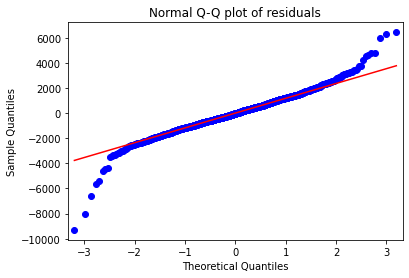

In [27]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [28]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

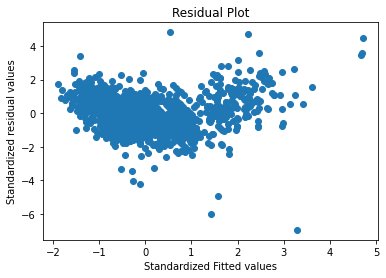

In [29]:
plt.scatter(get_standardized_values(model_1.fittedvalues),
            get_standardized_values(model_1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

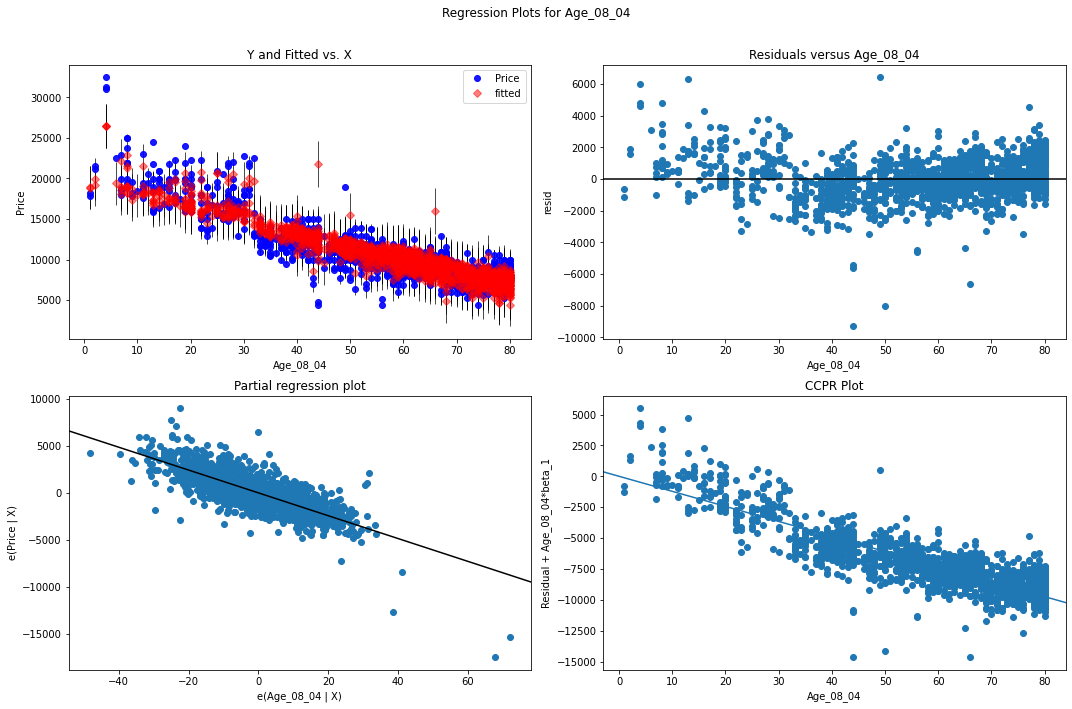

In [30]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_1, "Age_08_04", fig=fig)
plt.show()

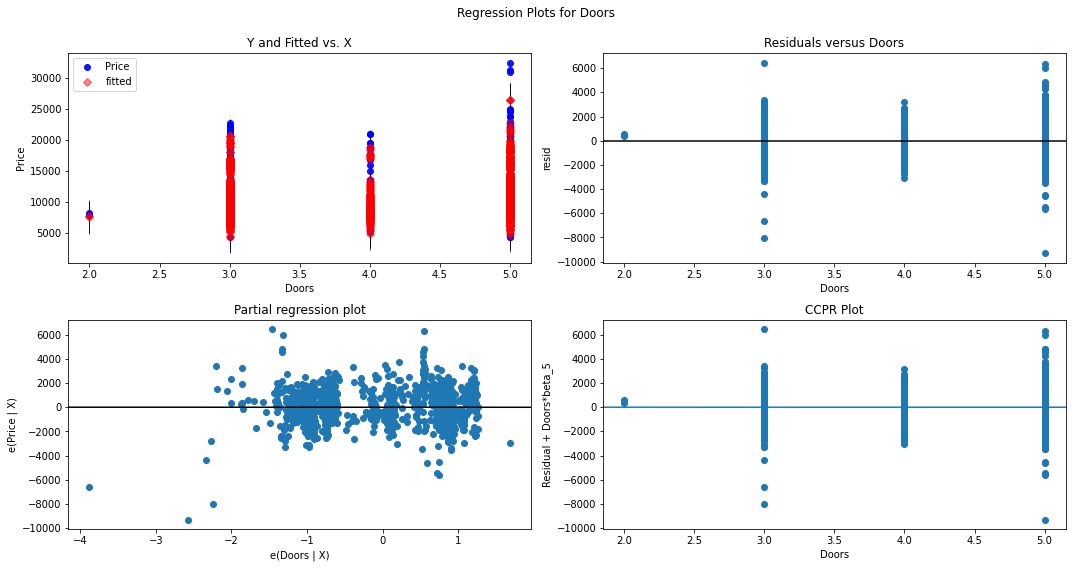

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Doors", fig=fig)
plt.show()

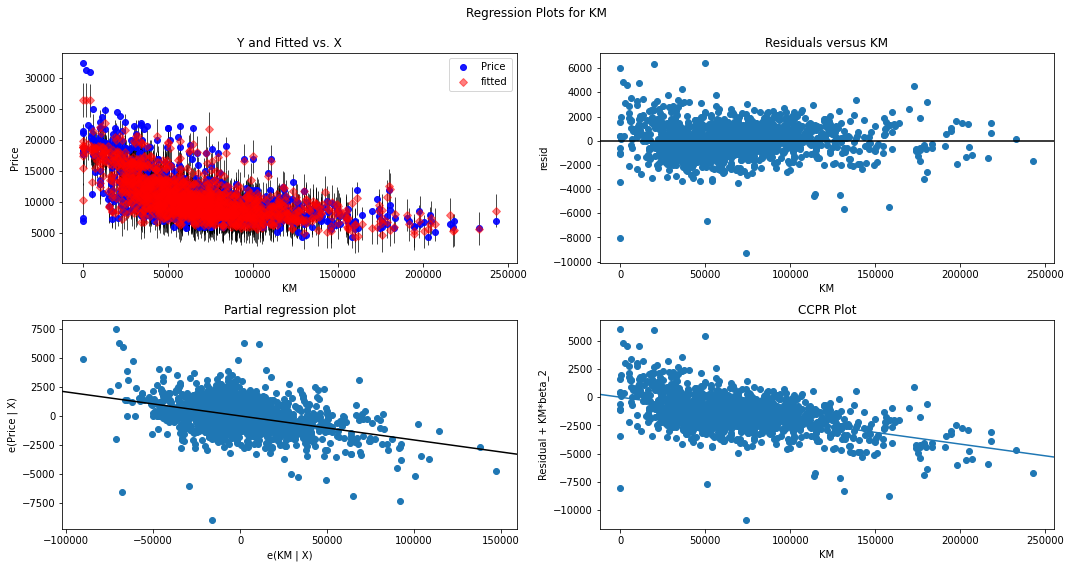

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "KM", fig=fig)
plt.show()

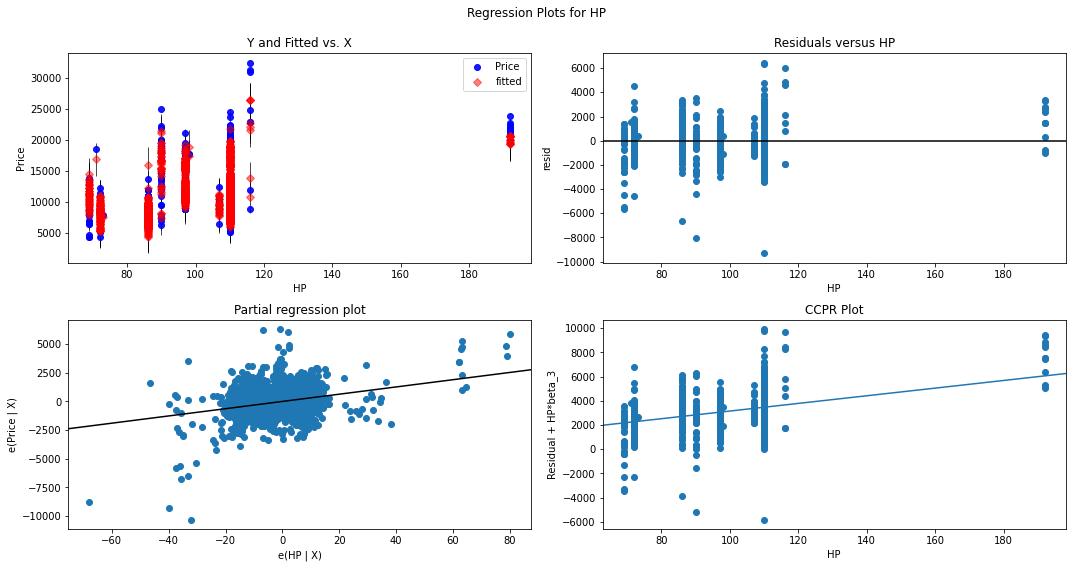

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "HP", fig=fig)
plt.show()

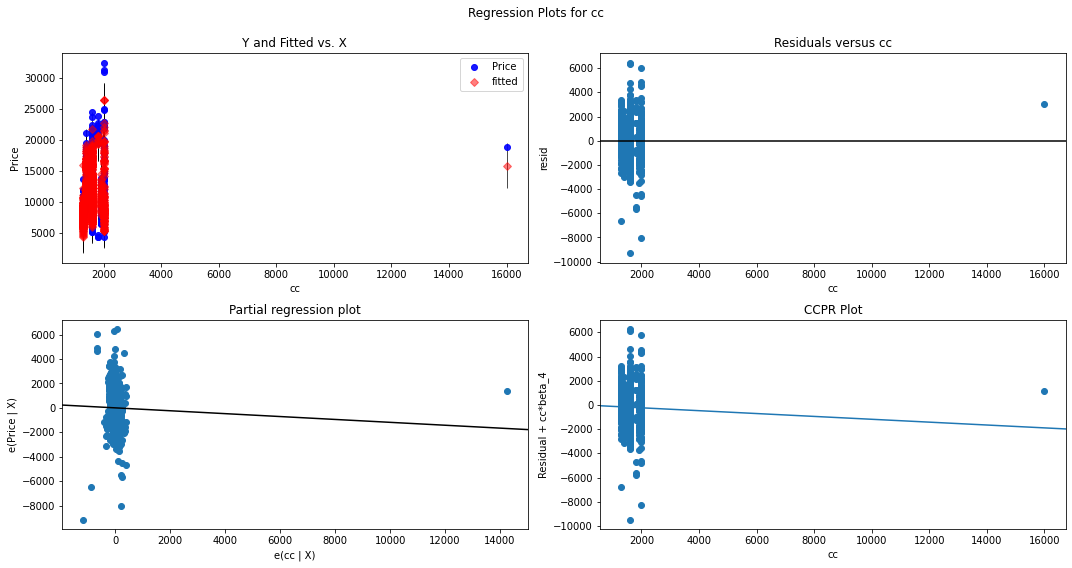

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "cc", fig=fig)
plt.show()

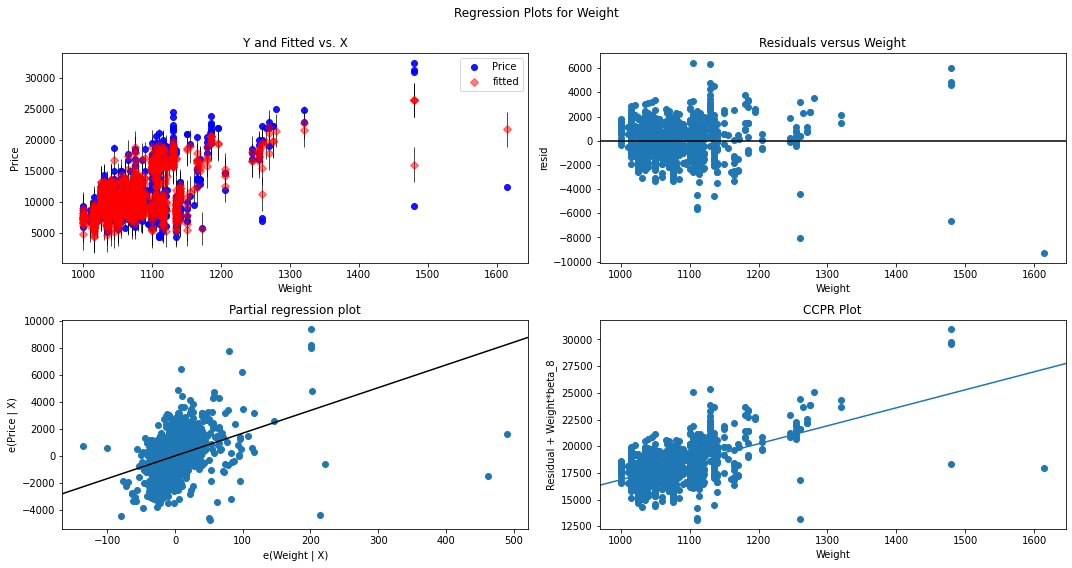

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Weight", fig=fig)
plt.show()

# Detecting Influencers/Outliers

# We'll proceed for Model Deletion Diagnostics

# Iteration - 1 

In [36]:
#Cook’s Distance
model_influence = model_1.get_influence()
(c, _) = model_influence.cooks_distance

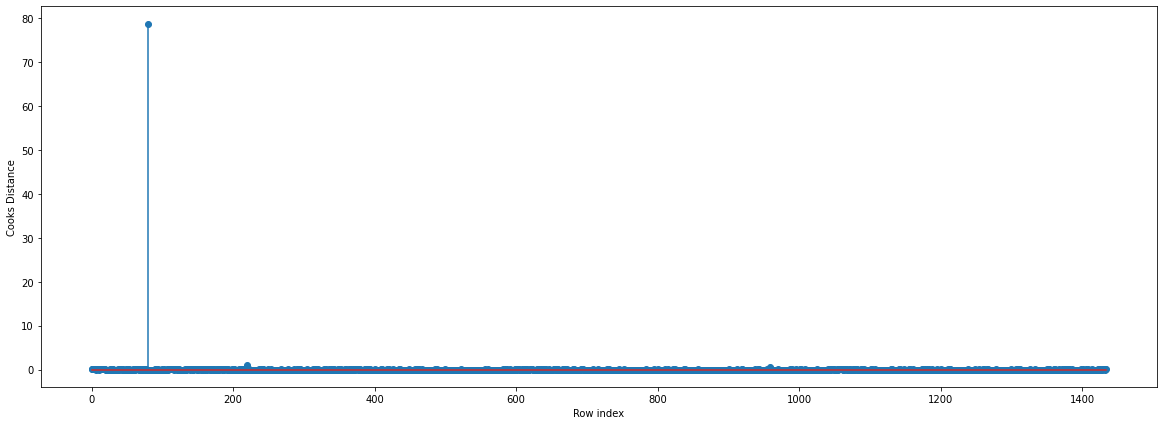

In [37]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
np.argmax(c), np.max(c)

(80, 78.7295058224916)

In [39]:
tc2 = tc1.drop([80],axis=0).reset_index()

In [40]:
tc2 = tc2.drop(['index'],axis=1)

In [41]:
tc2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [42]:
model_3= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=tc2).fit()

In [43]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:12:13   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age_08_04      -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM               -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP               39.2245      2.912     13.470      0.000      33.512      44.937
cc               -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors           -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears           527.1292    192.832      2.734      0.006     148.864     905.395
Quarterly_Tax     8.9414      1.427      6.268      0.000       6.143      11.740
Weight           20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Iteration - 2

In [44]:
#Cook’s Distance
model_influence = model_3.get_influence()
(c1, _) = model_influence.cooks_distance

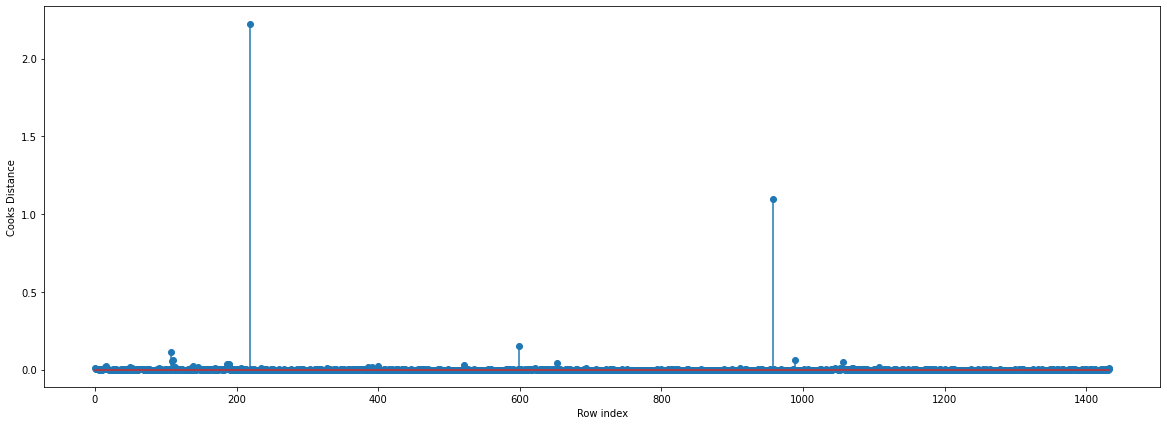

In [45]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc2)), np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
np.argmax(c1), np.max(c1)

(219, 2.2253513655270813)

In [47]:
tc3 = tc2.drop([219],axis=0).reset_index()

In [48]:
tc3 = tc3.drop(['index'],axis=1)

In [49]:
model_4= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=tc3).fit()

In [50]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1264.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:12:13   Log-Likelihood:                -12270.
No. Observations:                1433   AIC:                         2.456e+04
Df Residuals:                    1424   BIC:                         2.461e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.018e+04   1398.103     -7.279      0.000   -1.29e+04   -7433.579
Age_08_04      -116.6301      2.509    -46.483      0.000    -121.552    -111.708
KM               -0.0172      0.001    -13.935      0.000      -0.020      -0.015
HP               39.2081      2.818     13.916      0.000      33.681      44.735
cc               -3.1922      0.305    -10.455      0.000      -3.791      -2.593
Doors           -64.7218     38.159     -1.696      0.090    -139.577      10.133
Gears           487.4310    186.626      2.612      0.009     121.340     853.522
Quarterly_Tax     7.8987      1.384      5.706      0.000       5.183      10.614
Weight           24.9584      1.189     20.983      0.000      22.625      27.292
==============================================================================
Omnibus:                      195.629   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1736.249
Skew:                          -0.308   Prob(JB):                         0.00
Kurtosis:                       8.357   Cond. No.                     3.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Iteration - 3

In [51]:
#Cook’s Distance
model_influence = model_4.get_influence()
(c2, _) = model_influence.cooks_distance

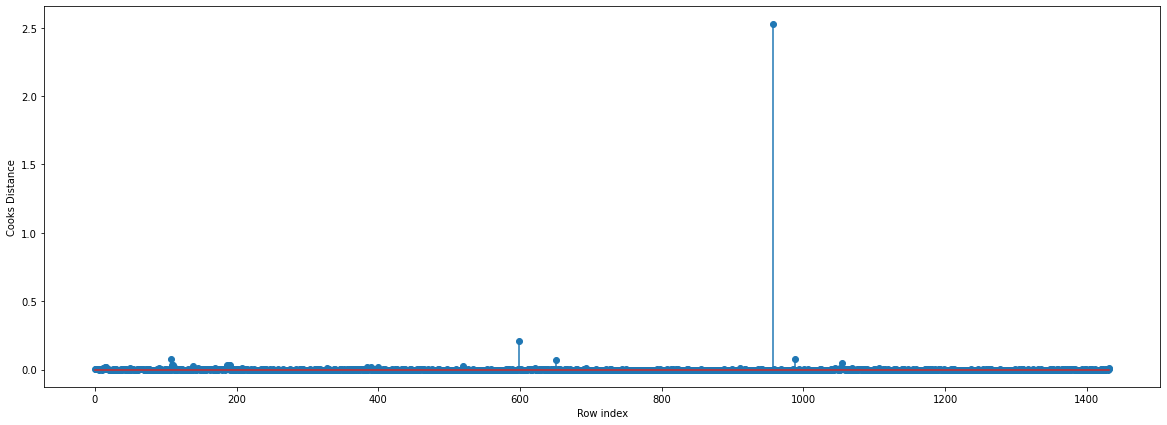

In [52]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc3)), np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
np.argmax(c2),np.max(c2)

(957, 2.530779623276654)

In [54]:
tc4 = tc3.drop([957],axis=0).reset_index()

In [55]:
tc4 = tc4.drop(['index'],axis=1)

In [56]:
model_5= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=tc4).fit()

In [57]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1355.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:12:14   Log-Likelihood:                -12218.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.468e+04   1436.358    -10.222      0.000   -1.75e+04   -1.19e+04
Age_08_04      -112.0629      2.481    -45.176      0.000    -116.929    -107.197
KM               -0.0170      0.001    -14.135      0.000      -0.019      -0.015
HP               36.5587      2.747     13.308      0.000      31.170      41.947
cc               -3.7852      0.303    -12.508      0.000      -4.379      -3.192
Doors          -121.9808     37.498     -3.253      0.001    -195.539     -48.423
Gears           466.6014    181.031      2.577      0.010     111.485     821.718
Quarterly_Tax     5.1754      1.373      3.770      0.000       2.482       7.869
Weight           30.5667      1.295     23.595      0.000      28.025      33.108
==============================================================================
Omnibus:                      121.369   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.907
Skew:                          -0.078   Prob(JB):                    6.31e-153
Kurtosis:                       6.424   Cond. No.                     3.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Iteration - 4

In [58]:
model_influence = model_5.get_influence()
(c3, _) = model_influence.cooks_distance

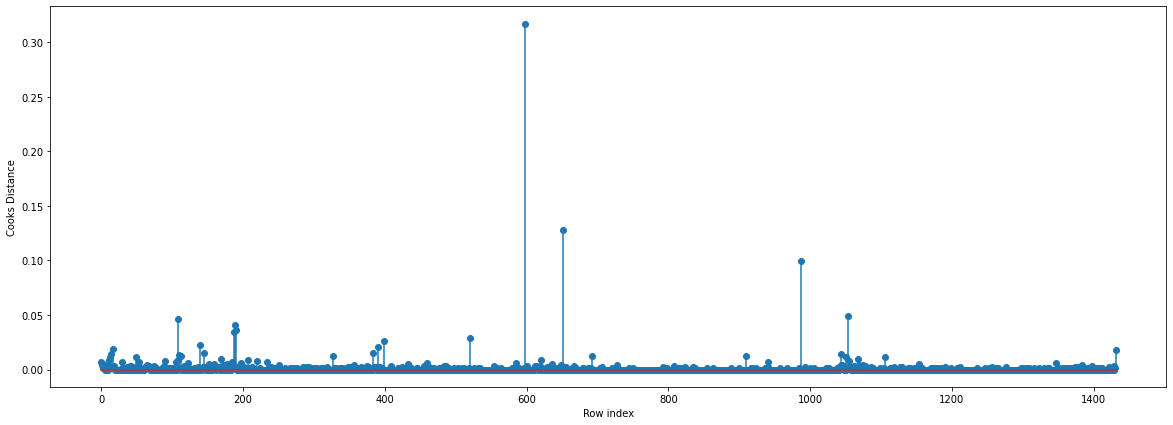

In [59]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc4)), np.round(c3, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
np.argmax(c3), np.max(c3)

(598, 0.31689035401452564)

In [61]:
tc5 = tc4.drop([598], axis=0).reset_index()

In [62]:
tc5 = tc5.drop(['index'],axis=1)

In [63]:
model_6 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=tc5).fit()

In [64]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1413.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:12:15   Log-Likelihood:                -12182.
No. Observations:                1431   AIC:                         2.438e+04
Df Residuals:                    1422   BIC:                         2.443e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.613e+04   1423.155    -11.333      0.000   -1.89e+04   -1.33e+04
Age_08_04      -110.3700      2.445    -45.135      0.000    -115.167    -105.573
KM               -0.0177      0.001    -14.951      0.000      -0.020      -0.015
HP               34.2632      2.714     12.625      0.000      28.940      39.587
cc               -3.6790      0.297    -12.372      0.000      -4.262      -3.096
Doors          -143.5437     36.919     -3.888      0.000    -215.965     -71.122
Gears           469.5788    177.682      2.643      0.008     121.033     818.125
Quarterly_Tax     3.6472      1.363      2.676      0.008       0.973       6.321
Weight           32.1321      1.289     24.931      0.000      29.604      34.660
==============================================================================
Omnibus:                       75.132   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.049
Skew:                           0.122   Prob(JB):                     6.82e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Iteration - 5

In [65]:
model_influence = model_6.get_influence()
(c4, _) = model_influence.cooks_distance

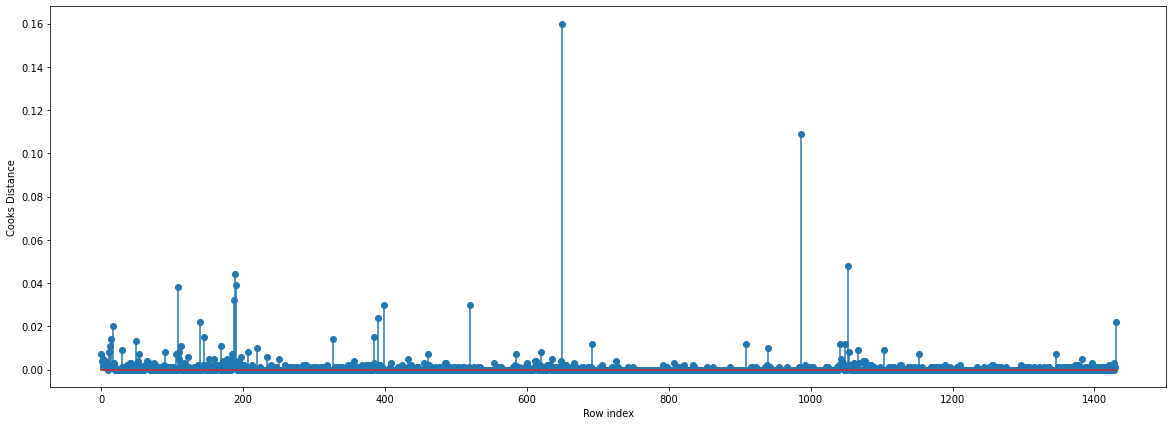

In [66]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc5)), np.round(c4, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [67]:
np.argmax(c4), np.max(c4)

(650, 0.16028069686041224)

In [68]:
tc6 = tc5.drop([650], axis=0).reset_index()

In [69]:
tc6 = tc6.drop(['index'],axis=1)

In [70]:
model_7 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=tc6).fit()

In [71]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1441.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:12:15   Log-Likelihood:                -12161.
No. Observations:                1430   AIC:                         2.434e+04
Df Residuals:                    1421   BIC:                         2.439e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.726e+04   1426.767    -12.097      0.000   -2.01e+04   -1.45e+04
Age_08_04      -109.4344      2.430    -45.041      0.000    -114.201    -104.668
KM               -0.0176      0.001    -15.008      0.000      -0.020      -0.015
HP               33.0003      2.700     12.222      0.000      27.704      38.297
cc               -3.6590      0.295    -12.416      0.000      -4.237      -3.081
Doors          -160.8162     36.732     -4.378      0.000    -232.872     -88.761
Gears           463.0124    176.070      2.630      0.009     117.628     808.397
Quarterly_Tax     2.4608      1.370      1.797      0.073      -0.226       5.148
Weight           33.4197      1.301     25.693      0.000      30.868      35.971
==============================================================================
Omnibus:                       68.851   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.864
Skew:                           0.182   Prob(JB):                     1.78e-43
Kurtosis:                       4.781   Cond. No.                     3.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Iteration - 6

In [72]:
model_influence = model_7.get_influence()
(c5, _) = model_influence.cooks_distance

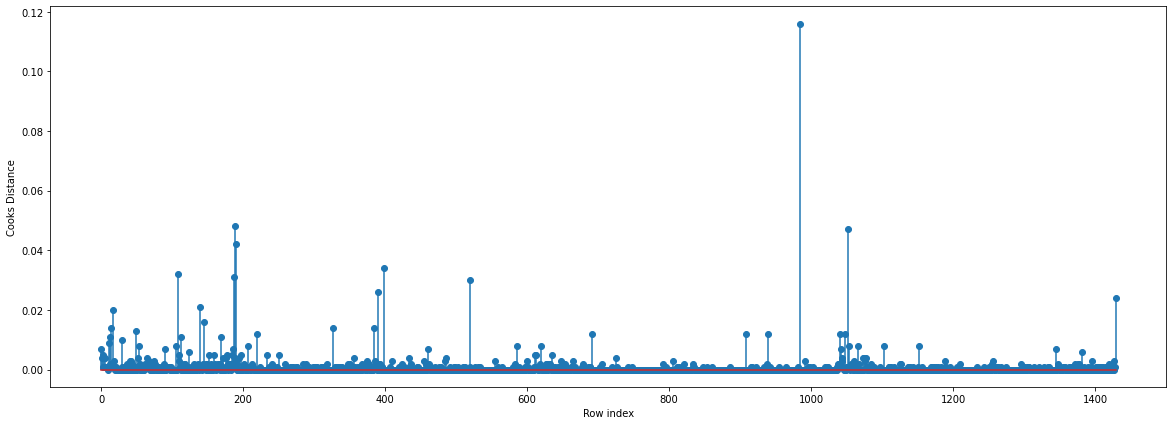

In [73]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc6)), np.round(c5, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [74]:
np.argmax(c5), np.max(c5)

(985, 0.11627991877786244)

In [75]:
tc7 = tc6.drop([985],axis=0).reset_index()

In [76]:
tc7= tc7.drop(['index'],axis=1)

In [77]:
model_8 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=tc7).fit()

In [78]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1451.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:12:16   Log-Likelihood:                -12148.
No. Observations:                1429   AIC:                         2.431e+04
Df Residuals:                    1420   BIC:                         2.436e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.663e+04   1435.694    -11.587      0.000   -1.95e+04   -1.38e+04
Age_08_04      -109.1772      2.423    -45.054      0.000    -113.931    -104.424
KM               -0.0176      0.001    -15.036      0.000      -0.020      -0.015
HP               33.5764      2.698     12.447      0.000      28.285      38.868
cc               -3.6793      0.294    -12.522      0.000      -4.256      -3.103
Doors          -169.9445     36.727     -4.627      0.000    -241.990     -97.899
Gears           286.6019    184.057      1.557      0.120     -74.451     647.655
Quarterly_Tax     2.4018      1.365      1.759      0.079      -0.277       5.080
Weight           33.6664      1.299     25.919      0.000      31.118      36.214
==============================================================================
Omnibus:                       69.786   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.649
Skew:                           0.196   Prob(JB):                     1.99e-43
Kurtosis:                       4.774   Cond. No.                     3.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Iteration - 7

In [79]:
model_influence = model_8.get_influence()
(c6, _) = model_influence.cooks_distance

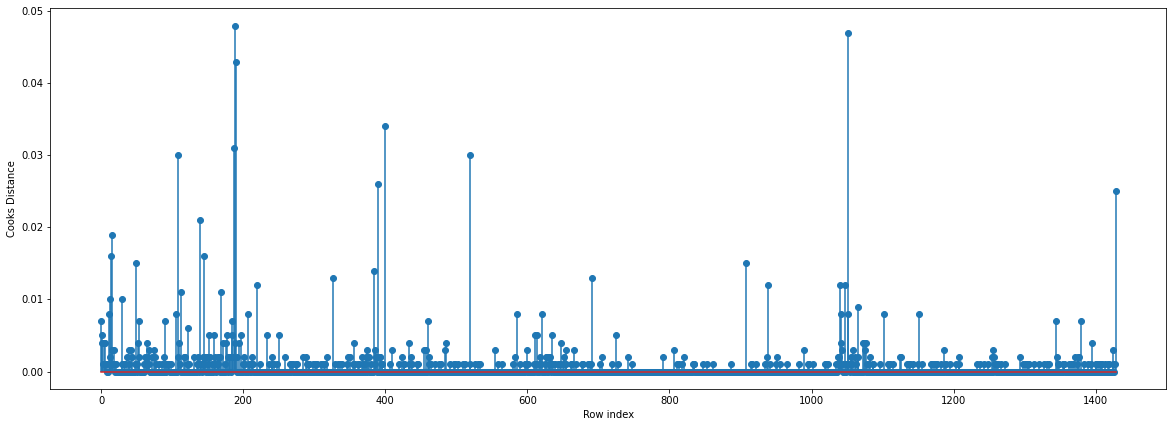

In [80]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc7)), np.round(c6, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [81]:
np.argmax(c6)

189

In [82]:
tc8 = tc7.drop([189], axis=0).reset_index()

In [83]:
tc8= tc8.drop(['index'],axis=1)

In [84]:
model_9 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=tc8).fit()

In [85]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1469.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:12:16   Log-Likelihood:                -12130.
No. Observations:                1428   AIC:                         2.428e+04
Df Residuals:                    1419   BIC:                         2.432e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.68e+04   1426.724    -11.775      0.000   -1.96e+04    -1.4e+04
Age_08_04      -109.7568      2.411    -45.527      0.000    -114.486    -105.028
KM               -0.0172      0.001    -14.803      0.000      -0.019      -0.015
HP               32.5353      2.690     12.095      0.000      27.259      37.812
cc               -3.6121      0.292    -12.359      0.000      -4.185      -3.039
Doors          -166.5398     36.493     -4.564      0.000    -238.127     -94.953
Gears           298.9806    182.867      1.635      0.102     -59.737     657.698
Quarterly_Tax     1.7590      1.364      1.289      0.197      -0.917       4.435
Weight           33.8138      1.291     26.197      0.000      31.282      36.346
==============================================================================
Omnibus:                       68.155   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.199
Skew:                           0.234   Prob(JB):                     2.46e-38
Kurtosis:                       4.641   Cond. No.                     3.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Iteration - 8

In [86]:
model_influence = model_9.get_influence()
(c7, _) = model_influence.cooks_distance

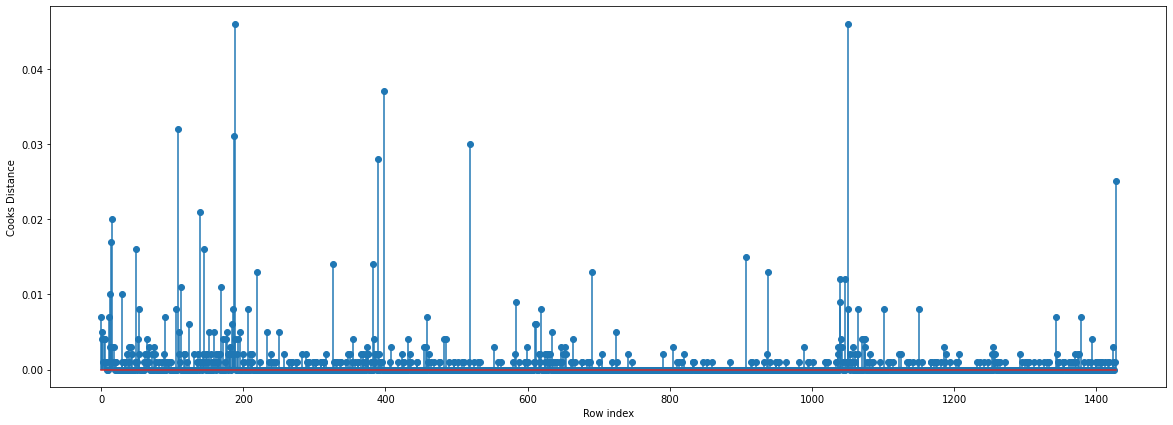

In [87]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc8)), np.round(c7, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

# Since the cook's distance for many points seem to be falling the same range, so we can conclude that the model formed in the iteration 7 can be taken as the final model for predicting price

In [88]:
tc8.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [89]:
tc_final = tc8

In [90]:
final_model= model_9

In [91]:
print(tc_final)

      Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1423   7500         69  20544   86  1300      3      5             69    1025
1424  10845         72  19000   86  1300      3      5             69    1015
1425   8500         71  17016   86  1300      3      5             69    1015
1426   7250         70  16916   86  1300      3      5             69    1015
1427   6950         76      1  110  1600      5      5             19    1114

[1428 rows x 9 columns]


In [92]:
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1469.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:12:17   Log-Likelihood:                -12130.
No. Observations:                1428   AIC:                         2.428e+04
Df Residuals:                    1419   BIC:                         2.432e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.68e+04   1426.724    -11.775